## Ganiyu Saheed Adisa
### Homework #5 (problem 25.3)

**Problem 25.3.** There are $N=10$ particles that occupy discrete sites in a ring of length $L=40$. (See the picture below.) No two particles may occupy the same site. One can represent the state, e.g., by the coordinates of the particles $0 \leq x_n<L$, with $1 \leq n \leq N$. In this case $x_m \neq x_n$ whenever $m \neq n$. Another way to represent the state is the set of numbers $n_x$, where $0 \leq x<L$, which are equal to either 0 (no particle at site $x$ ) or 1 (there is a particle at site $x$ ). The energy of the state is equal to minus the number of neighboring pairs of particles (here $n_L$ is used as an alias for $n_0$ ):

$$
E\{\boldsymbol{x} \text { or } \boldsymbol{n}\}=-\sum_{x=0}^{L-1} n_x n_{x+1}=-\sum_{m=1}^N \sum_{n=1}^N \delta_{x_m-x_n, 1(\bmod L)}=-\sum_{m=1}^{N-1} \sum_{n=m+1}^N \begin{cases}1, & \left|x_m-x_n\right|=1 \\ 0, & \left|x_m-x_n\right| \neq 1\end{cases}
$$
![alt text here](fig1.png)

The distribution over states is $\mathrm{P}($ state $)=\exp (-E$ (state $) / T) / Z(T)$, where $T$ is temperature and $Z(T)=\sum_{\text {state }} \exp (-E($ state $) / T)$ is the partition sum (for normalization). Plot the average energy $\langle E\rangle=\sum_{\text {state }} E$ (state) $\mathrm{P}($ state) as a function of temperature $T$ (e.g., for $0 \leq T \leq 2$ ). 

**Solution:** from
$$
\begin{aligned}
\langle E\rangle & = \sum_{\text {state }} E (\text {state }) \mathrm{P}( \text {state }) \\
& = \frac{\sum_{\text {state }} E(\text { state }) e^{-E(\text { state }) / T}}{\sum_{\text {state }} e^{-E(\text { state }) / T}}.
\end{aligned}
$$

Following the above formula, I first find all the possible unique states, which is of size ${}^{40}C_{10} = 847660528$, then compute the average energy according the above formula as a function of temperature.

In [5]:
import numpy as np
import itertools

def energy(state):
    L = len(state)
    #energys = -sum(state[i]*state[(i+1)%L] for i in range(L))
    energys = -np.dot(state, np.roll(state, -1)) # Vectorized energy computation
    return energys

def avg_energy(T, L, N):
    Z = 0
    E = 0
    #print("Temp =", T)
    for state in all_states(L, N):
        state_energy = energy(state)
        Z += np.exp(-state_energy/T)
        E += state_energy*np.exp(-state_energy/T)
    return E/Z

def all_states(L, N):
    # generate all possible unique states
    for pos in itertools.combinations(range(L), N):
        state = [0]*L
        for p in pos:
            state[p] = 1  # asigning 1 to each possible positions in the state
        #if state[::-1] < state:
            # Take advantage of symmetry
            #continue
        yield state

L = 40
N = 10
temps = np.linspace(0.1, 2, 5)
energies = []
for T in temps:
    res = avg_energy(T, L, N)
    energies.append(res)
energies

Temp = 0.1
Temp = 0.575
Temp = 1.05
Temp = 1.525
Temp = 2.0


[-8.994350861124682,
 -4.951083399054623,
 -3.7235523456901447,
 -3.2625683382338426,
 -3.025799826962755]

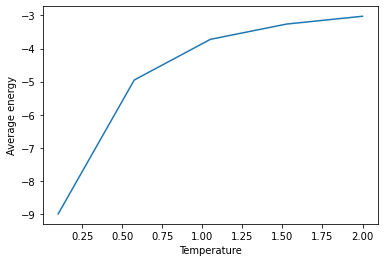

In [6]:
import matplotlib.pyplot as plt

plt.plot(temps, energies)
plt.xlabel('Temperature')
plt.ylabel('Average energy')
plt.show()

**Observation:** I computed the average energy for the range of temperature $ 0.1 \leq T \leq 2$ because if I start from zero I do encounter overflow in the exponential function, which always end up with "nan" value. Moreover, using lenght of ring $L = 40$ and number of particle $N = 10$ takes some hours to complete, which made me to make few partitions$(5)$ of the the given range. But, with others combinations such as ${}^{40}C_{5}$, and ${}^{40}C_{36}$ are faster (just few minutes) and I am able to create more paritions within the the given range. The following are there results.

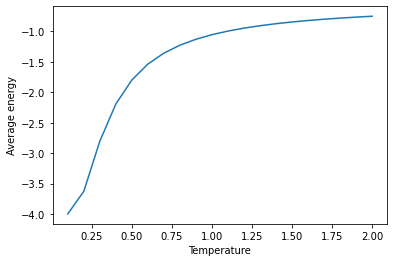

In [17]:
# Computing for L = 40 with N = 5
L = 40
N = 5
temps = np.linspace(0.1, 2, 20)
energies = []
for T in temps:
    res = avg_energy(T, L, N)
    energies.append(res)

# Ploting
plt.plot(temps, energies)
plt.xlabel('Temperature')
plt.ylabel('Average energy')
plt.show()

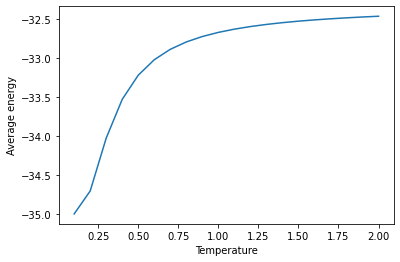

In [18]:
# Computing for L = 40 with N = 36
L = 40
N = 36
temps = np.linspace(0.1, 2, 20)
energies = []
for T in temps:
    res = avg_energy(T, L, N)
    energies.append(res)

# Plotting
plt.plot(temps, energies)
plt.xlabel('Temperature')
plt.ylabel('Average energy')
plt.show()

**Observation:** Generally, we noticed from all the above results that as temperature increases, the energy also increases. Further more, we notice that, as number of particles increase, the energy decrease in relation to the ring of lenght $L = 40$.